<a href="https://colab.research.google.com/github/adielws/covid19-questions/blob/master/covid19_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importando *dataset* do Google Drive



In [1]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
!ls '/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv'
#!ls '/content/drive/Shared drives/TRABALHO_POS/FULL.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MILL.csv'


In [3]:
import pandas as pd
import datetime
import numpy as np

data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
#data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/FULL.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
data.head(5)

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\r\n\r\nSolicite...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


In [4]:
data.dtypes

data           object
usuario        object
apelido        object
texto          object
retweet         int64
seguidores      int64
idioma         object
lugar          object
pais           object
sigla          object
latitude      float64
longitude     float64
hashtags       object
dtype: object

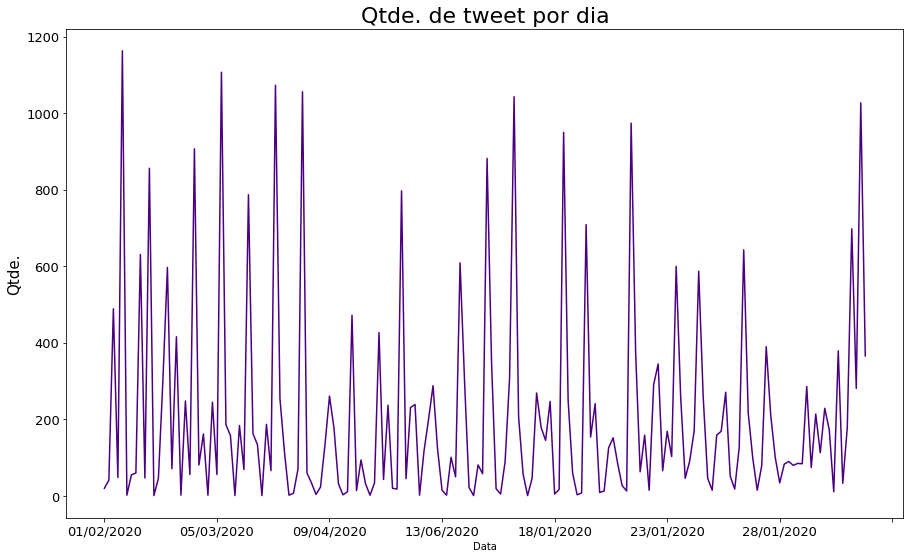

In [5]:
import matplotlib.pyplot as plt
data['data'] = pd.to_datetime(data["data"])
df = data.groupby(pd.to_datetime(data.data).dt.strftime('%d/%m/%Y')).data.count()

ax = df.plot(kind='line', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Qtde. de tweet por dia", fontsize=22)
ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("Data", fontsize=10);
plt.show()

In [6]:
conditions = [
    (data.data.dt.hour >= 0) & (data.data.dt.hour <=6),
    (data.data.dt.hour > 6) & (data.data.dt.hour <=12),
    (data.data.dt.hour > 12) & (data.data.dt.hour <=18),
    (data.data.dt.hour > 18) & (data.data.dt.hour <=23)
    ]
values = ['MADRUGADA', 'MANHÃ', 'TARDE', 'NOITE']

data['partes_dia'] = np.select(conditions, values)
data['dia_da_semana'] = data.data.dt.day_name()


data['dia_da_semana'] = pd.Categorical(data['dia_da_semana'], categories=
    ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    ordered=True)

data['partes_dia'] = pd.Categorical(data['partes_dia'], categories=
    ['MADRUGADA', 'MANHÃ','TARDE','NOITE'],
    ordered=True)

data.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,partes_dia,dia_da_semana
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],TARDE,Monday
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[],MADRUGADA,Wednesday
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[],MANHÃ,Sunday
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],NOITE,Wednesday
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\r\n\r\nSolicite...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[],TARDE,Thursday


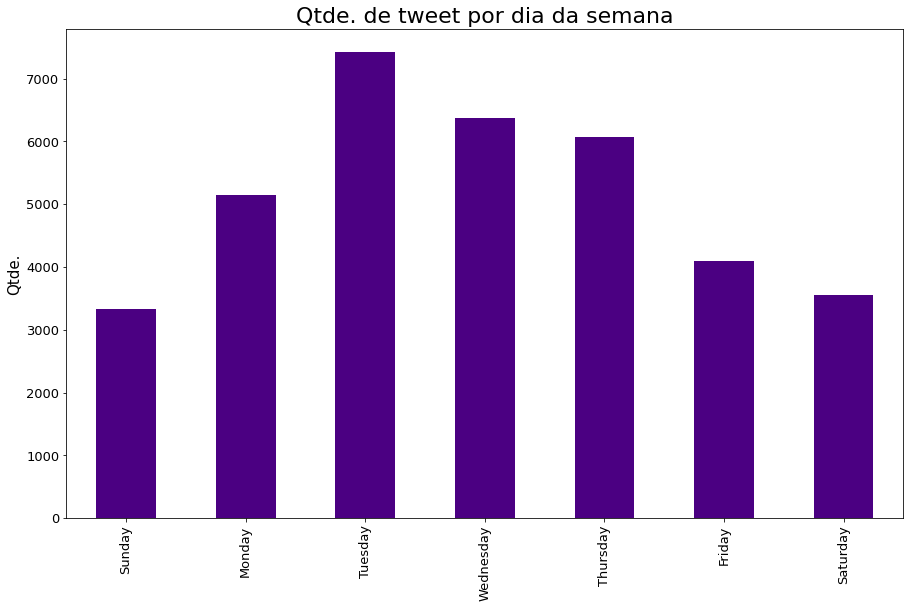

In [7]:
df1 = data.groupby('dia_da_semana').dia_da_semana.count()

ax = df1.plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Qtde. de tweet por dia da semana", fontsize=22)


ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("", fontsize=10);

plt.show()

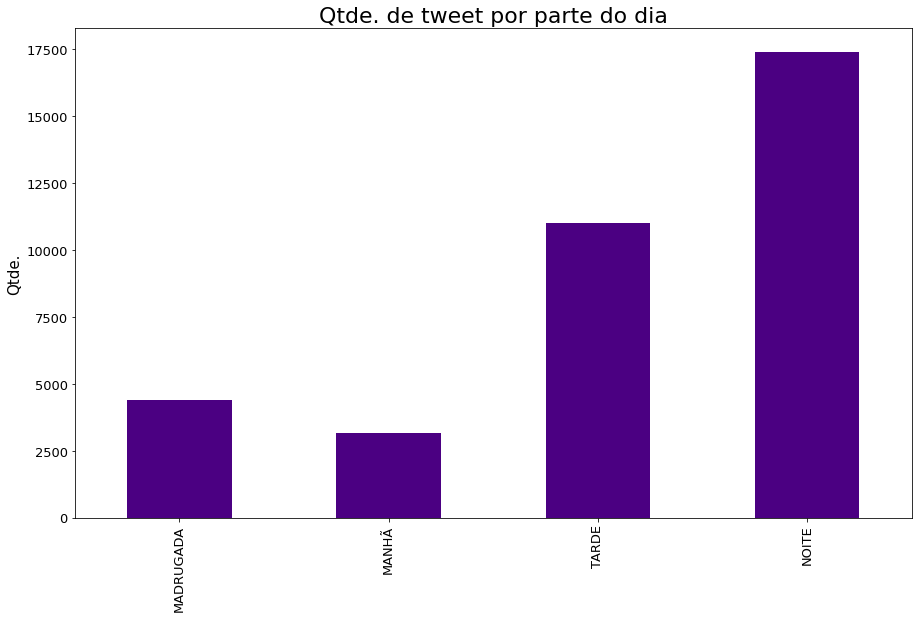

In [8]:
df2 = data.groupby('partes_dia').dia_da_semana.count()

ax = df2.plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Qtde. de tweet por parte do dia", fontsize=22)

ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("", fontsize=10);

plt.show()

# Visualizando informações básicas do *dataset*


In [9]:
data.shape

(36002, 15)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36002 entries, 0 to 36001
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data           36002 non-null  datetime64[ns]
 1   usuario        36000 non-null  object        
 2   apelido        36002 non-null  object        
 3   texto          36002 non-null  object        
 4   retweet        36002 non-null  int64         
 5   seguidores     36002 non-null  int64         
 6   idioma         36002 non-null  object        
 7   lugar          1594 non-null   object        
 8   pais           1594 non-null   object        
 9   sigla          1594 non-null   object        
 10  latitude       190 non-null    float64       
 11  longitude      190 non-null    float64       
 12  hashtags       36002 non-null  object        
 13  partes_dia     36002 non-null  category      
 14  dia_da_semana  36002 non-null  category      
dtypes: category(2), dat

In [11]:
data.idioma.unique() # categorias de idiomas

array(['pt', 'en', 'es', 'ar', 'tl', 'fr', 'und', 'nl', 'ja', 'cy', 'th',
       'fa', 'it', 'de', 'tr', 'eu', 'ca', 'ko', 'in', 'ht', 'lt', 'zh',
       'hi', 'lv', 'sv', 'is', 'pl', 'ur', 'sd', 'vi', 'no', 'te', 'cs',
       'ta', 'da', 'ru', 'hu', 'ro', 'et', 'uk'], dtype=object)

In [12]:
data.pais.unique() # categorias de países

array([nan, 'Brazil', 'Ireland', 'Portugal', 'Spain', 'Germany', 'Canada',
       'United States', 'Angola', 'Uganda', 'The Netherlands', 'Japan',
       'United Kingdom', 'Republic of Mozambique', 'Belgium',
       'Kingdom of Saudi Arabia', 'Venezuela', 'Pakistan', 'Indonesia',
       'Chile', 'Senegal', 'Argentina', 'Colombia', 'France', 'Turkey',
       'Austria', 'Paraguay', 'Italy', 'New Zealand'], dtype=object)

In [13]:
data.sigla.unique() # categorias de siglas

array([nan, 'BR', 'IE', 'PT', 'ES', 'DE', 'CA', 'US', 'AO', 'UG', 'NL',
       'JP', 'GB', 'MZ', 'BE', 'SA', 'VE', 'PK', 'ID', 'CL', 'SN', 'AR',
       'CO', 'FR', 'TR', 'AT', 'PY', 'IT', 'NZ'], dtype=object)

In [14]:
data.data.min() # data do tweet mais antigo

Timestamp('2020-01-02 01:55:32')

In [15]:
data.data.max() # data do tweet mais recente

Timestamp('2020-06-30 23:59:42')

In [16]:
data.hashtags.describe() # detalhes da coluna hashtags

count     36002
unique     2185
top          []
freq      32464
Name: hashtags, dtype: object

# Analisando a Frequência das Hashtags


Nesta seção, vamos visualizar a frequência das hashtags no nosso dataset. Para isso, vamos utilizar um gráfico conhecido como nuvem de palavras. Nós vamos implementar usando a biblioteca [Wordcloud](https://https://github.com/amueller/word_cloud).

In [17]:
!pip install wordcloud -q

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Nós vamos criar uma série a partir do atributo *hashtag* do dataframe. Nós vamos incluir nessa série apenas os valores não faltantes.

In [19]:
hashtags = data.dropna(subset=['hashtags'])['hashtags']
hashtags.describe()

count     36002
unique     2185
top          []
freq      32464
Name: hashtags, dtype: object

In [20]:
hashtags.unique() # visualizando valores únicos.

array(['[]', "['tvPT']", "['Venezuela']", ...,
       "['Fotogrâfo', 'passaros']", "['novocoronavírus', 'Covid19']",
       "['UNVCompartilhado']"], dtype=object)

Podemos ver que cada item da série é um array de strings, cujos valores são as hashtags de uma linha do dataframe. Portanto, precisamos separar esses valores em strings individuais, para que possamos calcular sua frequência.

Mas antes vamos remover da série os itens cujo valor é um array vazio. Eles são os itens que têm o valor '[]'.

In [21]:
hashtags = hashtags[hashtags != '[]'] # removendo itens que não tem hashtags
hashtags.describe()

count            3538
unique           2184
top       ['COVID19']
freq              208
Name: hashtags, dtype: object

In [22]:
hashtags.unique() # visualizando valores únicos. Veja que não existe mais o valor '[]'.

array(["['tvPT']", "['Venezuela']", "['Covid_19']", ...,
       "['Fotogrâfo', 'passaros']", "['novocoronavírus', 'Covid19']",
       "['UNVCompartilhado']"], dtype=object)

Agora vamos dividir os arrays em palavras e, por fim.

In [23]:
def split(item):
  "This parses a string of a list of words into an array of individual words"
  tags = str(item).translate({ord(i): None for i in ' []\''})
  return tags.split(',')

hashtags = hashtags.apply(split)
hashtags = np.concatenate(hashtags.values.tolist())

Vamos concatenar todas as palavras em uma só, separando-as com espaço.

Em seguida, criaremos a nuvem de palavras usando a biblioteca Wordcloud.

Por fim, vamos exibi-la usando a biblioteca Matplotlib.

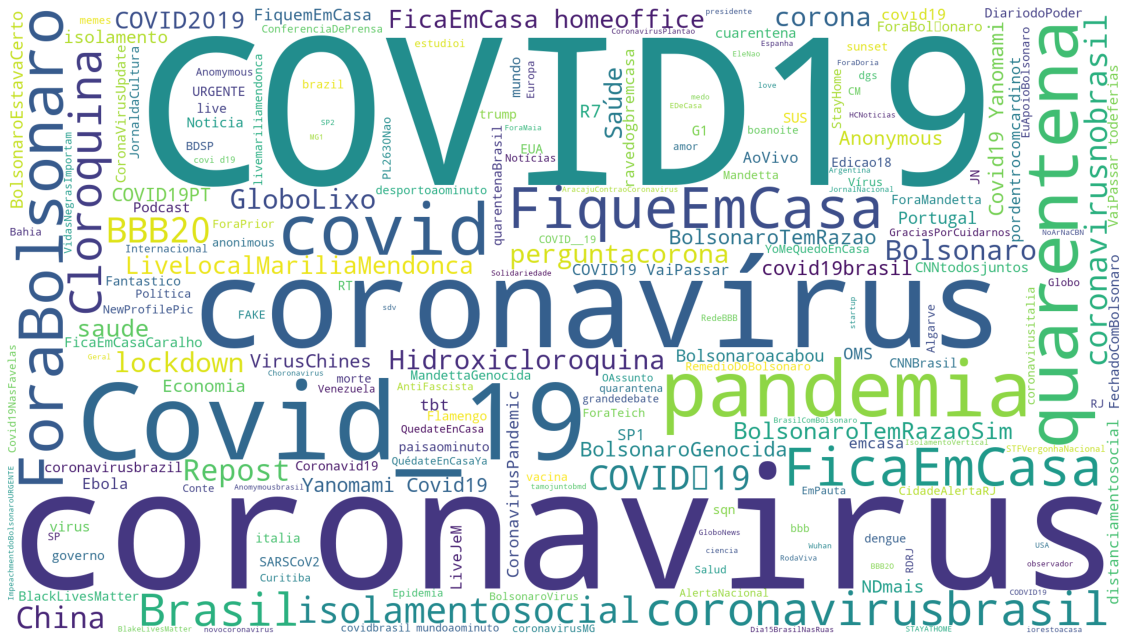

In [24]:
# concatenando as palavras
all_hashtags = " ".join(s for s in hashtags)

# criando a nuvem de palavras
wordcloud = WordCloud(background_color="white", width=1920, height=1080).generate(all_hashtags)

# mostrando a imagem final
fig, ax = plt.subplots(figsize=(20,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

Observe que há várias ocorrências de tags repetidas, como *COVID19*. Será necessário fazer mais um tratamento nos dados das hashtags para agrupar essas ocorrências repetidas.

Após o tratamento, vamos escrever aqui os resultados. Mas já podemos observar que as hashtags mais postadas foram *#COVID19*, *#coronavirus*, *#FiqueEmCasa*, *#pandemia* e *#quarentena*.

# Gerando *dataset* DuvidasDB com perguntas extraídas do *dataset* original

In [25]:
import re

def get_questions(txt):
  "gets  all the questions that are in the txt"
  return re.findall('[A-Za-z].*\?', txt)

In [26]:
# get tweet series
tweets = data.texto
tweets.head(5)

0    @BolsonaroSP Cade o fundão deputado??? Congres...
1    Em ação preventiva, o Governo do Estado suspen...
2    Incrível como os defensores do fim do distanci...
3    Fumaça de cigarro pode propagar coronavírus? h...
4    🚨Todos juntos contra COVID-19💪\r\n\r\nSolicite...
Name: texto, dtype: object

In [27]:
# apply 'get_questions' in all tweets
questions_arrays = tweets.apply(get_questions)
print(questions_arrays)

0                  [BolsonaroSP Cade o fundão deputado???]
1                                                       []
2                                                       []
3           [Fumaça de cigarro pode propagar coronavírus?]
4                                                       []
                               ...                        
35997                                                   []
35998                                                   []
35999    [Vocês já viram se seus seguros de vida cobrem...
36000                                                   []
36001                                                   []
Name: texto, Length: 36002, dtype: object


A fazer: aplicar a função de extrair perguntas sobre o conteúdo completo do tweet. Para isso, será necessário baixar o texto usando a URL do tweet. Para isso, vamos obter as short URLs dos tweets que as têm.

In [28]:
# obtain full content for tweet series
def has_URL(tweet):
  "Scan through string looking for a tweet URL, returning True if it has or False otherwise."
  return re.search('https.*$', tweet) != None  

def get_URL(tweet):
  return re.findall('https.*$', tweet)

has = tweets[tweets.apply(has_URL)]
urls = has.apply(get_URL)
display(urls)

1        [https://t.co/EPFXOMtwSY]
2        [https://t.co/oEyXDF9cDy]
3        [https://t.co/JT1oMiUCXf]
4        [https://t.co/p6wcoomynZ]
5        [https://t.co/dj4w3M7e5R]
                   ...            
35992    [https://t.co/x9H0EK7H5P]
35995    [https://t.co/A7vRlvpfLW]
35999    [https://t.co/xWHAwuXbw4]
36000    [https://t.co/5GrMV4R6QG]
36001    [https://t.co/xlB7oK6FGF]
Name: texto, Length: 23946, dtype: object

Abaixo, vamos elaborar uma estratégia para obter o texto completo do tweet usando sua short URL.

In [29]:
import tweepy

consumer_key = "vXpGl6obnpLwkP6OBqxIgvBX3"
consumer_secret = "rIOwNZ80HMqz9fkpKQ8XompdoCC0f11YmdI3jXTH2dyUM30rIM"

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth)

# Por enquanto, vou obter o texto completo usando o ID do tweet. 
# Posteriormente, desejo obter o texto completo a partir da short URL.
def get_full_text_using_id(tweet_id):
  status = api.get_status(tweet_id, tweet_mode = "extended")
  return status.full_text

tweet_id = 1240115265423147017
print(get_full_text_using_id(tweet_id))

Em ação preventiva, o Governo do Estado suspendeu as aulas da rede estadual até 31 de março. ⁣
⁣
Esta ação está alinhada às estratégias de combate à proliferação do novo Coronavírus (Covid-19) no Pará. ❌🦠⁣
⁣Somente a distribuição da merenda escolar será mantida🥤🍎⁣
⁣📚⁣ https://t.co/iUsQEbEi5C


#**Processando as palavras das frases**

In [30]:
interrogacao ='?'
data['interrogativa'] = np.where(data['texto'].str.find(interrogacao)!= -1, True, False)
data.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,partes_dia,dia_da_semana,interrogativa
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],TARDE,Monday,True
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[],MADRUGADA,Wednesday,False
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[],MANHÃ,Sunday,False
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],NOITE,Wednesday,True
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\r\n\r\nSolicite...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[],TARDE,Thursday,False


In [31]:
data['interrogativa'].value_counts()

False    32302
True      3700
Name: interrogativa, dtype: int64

In [32]:
df1 = data[data['interrogativa'] != False]
df1.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,partes_dia,dia_da_semana,interrogativa
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],TARDE,Monday,True
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],NOITE,Wednesday,True
38,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0,86,pt,NaN,NaN,NaN,NaN,NaN,[],MANHÃ,Thursday,True
45,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!\r\n\r\n #COVID19 #floripa #isola...,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",TARDE,Monday,True
57,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0,201,pt,NaN,NaN,NaN,NaN,NaN,[],MADRUGADA,Monday,True


In [33]:
textosPuros = df1['texto']
print(textosPuros)

0        @BolsonaroSP Cade o fundão deputado??? Congres...
3        Fumaça de cigarro pode propagar coronavírus? h...
38       @ipratesMD @dr_pampers Será que corremos o ris...
45       Prioridade ?!\r\n\r\n #COVID19 #floripa #isola...
57       Que tal uma notícia boa, indo na contramão do ...
                               ...                        
35983    Coronavírus? \r\n\r\nAqui é Dengue, leptospiro...
35987                          @Jorge_DR20 Omg qué pasoo!?
35991    o que mais tem engatilhado vcs nesse isolament...
35996    @brasil247 @oobservadorbr Deprimente... Testar...
35999    Vocês já viram se seus seguros de vida cobrem ...
Name: texto, Length: 3700, dtype: object


In [34]:
frases = textosPuros.str.lower()
print(frases)

0        @bolsonarosp cade o fundão deputado??? congres...
3        fumaça de cigarro pode propagar coronavírus? h...
38       @ipratesmd @dr_pampers será que corremos o ris...
45       prioridade ?!\r\n\r\n #covid19 #floripa #isola...
57       que tal uma notícia boa, indo na contramão do ...
                               ...                        
35983    coronavírus? \r\n\r\naqui é dengue, leptospiro...
35987                          @jorge_dr20 omg qué pasoo!?
35991    o que mais tem engatilhado vcs nesse isolament...
35996    @brasil247 @oobservadorbr deprimente... testar...
35999    vocês já viram se seus seguros de vida cobrem ...
Name: texto, Length: 3700, dtype: object


In [35]:
textosQuebrados = [nltk.tokenize.word_tokenize(frase) for frase in frases] # Quebra por palavras(pontuações)
print(textosQuebrados)

[['@', 'bolsonarosp', 'cade', 'o', 'fundão', 'deputado', '?', '?', '?', 'congresso', 'está', 'sentado', 'em', '3bi', 'olhando', 'a', 'pandemia', 'da', 'janela', '.'], ['fumaça', 'de', 'cigarro', 'pode', 'propagar', 'coronavírus', '?', 'https', ':', '//t.co/jt1omiucxf'], ['@', 'ipratesmd', '@', 'dr_pampers', 'será', 'que', 'corremos', 'o', 'risco', 'de', 'termos', 'piolhos', 'super', 'resistentes', '?', 'o', 'uso', 'de', 'ivermectina', 'já', 'está…', 'https', ':', '//t.co/gnusgwgqw1'], ['prioridade', '?', '!', '#', 'covid19', '#', 'floripa', '#', 'isolamento', 'https', ':', '//t.co/ikjchaimzn'], ['que', 'tal', 'uma', 'notícia', 'boa', ',', 'indo', 'na', 'contramão', 'do', 'que', 'a', 'mídia', 'corrupta', 'está', 'fazendo', '(', 'tocando', 'o', 'terror', 'na', 'população', ')', '?', 'sã…', 'https', ':', '//t.co/kpfutx089e'], ['@', 'josemedeirosmt', 'seria', 'isso', 'algum', 'tipo', 'aleatório', 'de', 'demência', 'provocando', 'pelo', 'coronavírus', '?'], ['``', 'nova', 'york', 'é', 'o', 

In [36]:
stemmer = nltk.stem.RSLPStemmer()
stopwords = nltk.corpus.stopwords.words('portuguese')

dicionario = set()

for lista in textosQuebrados:
    validas = [stemmer.stem(palavra) for palavra in lista if len(palavra) > 2 and palavra not in stopwords and palavra.find("//") == -1]
    dicionario.update(validas)

totalDePalavras = len(dicionario)

print("Quantidade toda de palavras distintas:", totalDePalavras)
print(dicionario)

Quantidade toda de palavras distintas: 7882
{'sàm', 'convém…', 'vem', 'get_repost', 'abcmach', 'em…', 'alun', 'renom', 'senho…', '🤦🏻\u200d♀️😂', 'pra.derrub', 'paso', 'desculp', 'aka', 'embarg', 'fez…', 'barri', 'aiii', 'intere…', 'difíc', 'respei…', 'conjunt', 'caron', 'nelson', 'coro…', 'kkkkk', 'desafi…', 'joaoazevedolim', 'lauraabcarvalh', 'telmadunamy', 'matriarc', 'onlin', 'dand', 'recus', 'zin', 'adi', 'vgzinnn18', 'públic', 'front', 'banan', 'exclus', 'mus', 'uai', 'brazil🌏farm🌎http', 'wilson', 'apocalip', 'disput', '17:36', 'assunt', 'missrainha420', 'betinhovaz', 'crít', 'mai…', 'déconfin', 'obtev', 'dic', 'maravilh', 'respost', '🇧🇷❤️', 'wuer…', 'tasabbur7', 'zeeb', 'clebervg', 'kakakakakak', 'ceda', 'rab', 'p/1°', 'abraça-l', 'cristinapeony', 'pandemôni', 'huck', 'piauí', 'joaosblu', 'sisasant', 'unarmed', 'rogeriobdolive1', 'bolsonarotemrazaosim', 'invent', 'lmonasteri', 'deput', 'benjy37039621', 'émesm', 'edgarsev', 'just', 'mes', 'famili', 'autodidat', 'recomend', 'hidrocl

In [37]:
tuplas = zip(dicionario, range(totalDePalavras))#Gera a relação PALAVRA & INDICE

tradutor = {palavra: indice for palavra, indice in tuplas}
print("TRADUTOR!", tradutor)

TRADUTOR! {'sàm': 0, 'convém…': 1, 'vem': 2, 'get_repost': 3, 'abcmach': 4, 'em…': 5, 'alun': 6, 'renom': 7, 'senho…': 8, '🤦🏻\u200d♀️😂': 9, 'pra.derrub': 10, 'paso': 11, 'desculp': 12, 'aka': 13, 'embarg': 14, 'fez…': 15, 'barri': 16, 'aiii': 17, 'intere…': 18, 'difíc': 19, 'respei…': 20, 'conjunt': 21, 'caron': 22, 'nelson': 23, 'coro…': 24, 'kkkkk': 25, 'desafi…': 26, 'joaoazevedolim': 27, 'lauraabcarvalh': 28, 'telmadunamy': 29, 'matriarc': 30, 'onlin': 31, 'dand': 32, 'recus': 33, 'zin': 34, 'adi': 35, 'vgzinnn18': 36, 'públic': 37, 'front': 38, 'banan': 39, 'exclus': 40, 'mus': 41, 'uai': 42, 'brazil🌏farm🌎http': 43, 'wilson': 44, 'apocalip': 45, 'disput': 46, '17:36': 47, 'assunt': 48, 'missrainha420': 49, 'betinhovaz': 50, 'crít': 51, 'mai…': 52, 'déconfin': 53, 'obtev': 54, 'dic': 55, 'maravilh': 56, 'respost': 57, '🇧🇷❤️': 58, 'wuer…': 59, 'tasabbur7': 60, 'zeeb': 61, 'clebervg': 62, 'kakakakakak': 63, 'ceda': 64, 'rab': 65, 'p/1°': 66, 'abraça-l': 67, 'cristinapeony': 68, 'pand

In [38]:
sequencia_palavras = []
for e in tradutor:
    sequencia_palavras.append(e)

In [39]:
def vetorizar_texto(texto, tradutor, stemmer): # Representando cd.. a frase em um array
    vetor = [0] * len(tradutor) # vetor com N POSIÇÕES ## Constroi o vetor para cada FRASE, traduz uma palavra para uma posição do vetor
    for palavra in texto:
        if len(palavra) > 0:# Comparando a palavra com a sua raíz
            raiz = stemmer.stem(palavra)
            if raiz in tradutor:
                posicao = tradutor[raiz]
                vetor[posicao] += 1
    return vetor
vetoresDeTexto = [vetorizar_texto(texto, tradutor, stemmer) for texto in textosQuebrados] # Função para vetorizar os textos, passa por todas as frases
resultado = [sum(x) for x in zip(*vetoresDeTexto)]
print(resultado)

[1, 1, 24, 2, 1, 4, 3, 1, 1, 1, 1, 1, 18, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 13, 1, 1, 1, 1, 1, 3, 9, 4, 1, 11, 1, 18, 1, 5, 1, 1, 6, 1, 1, 1, 2, 1, 8, 1, 1, 1, 1, 1, 1, 3, 4, 14, 1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 11, 1, 1, 1, 6, 19, 1, 1, 8, 1, 2, 380, 17, 1, 1, 14, 4, 1, 2, 1, 5, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 6, 1, 65, 1, 1, 6, 1, 1, 1, 2, 1, 92, 1, 1, 4, 1, 1, 1, 6, 1, 1, 2, 5, 1, 1, 1, 5, 1, 2, 1, 5, 3, 13, 1, 1, 5, 1, 1, 16, 1, 1, 2, 3, 1, 5, 4, 1, 4, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 4, 2, 1, 2, 1, 15, 2, 1, 1, 2, 2, 1, 2, 2, 3, 16, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 35, 8, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 67, 1, 5, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 2, 4, 1, 1, 1, 2, 1, 14, 1, 1, 3, 1, 1, 1, 12, 1, 1, 5, 1, 3, 1, 1, 2, 7, 1, 7, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 4, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 11, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 7, 15, 1, 1, 1, 1, 1, 

In [40]:
data = {
    'palavra' : sequencia_palavras,
    'repeticao' : resultado
}

palavra_repeticao = pd.DataFrame(data,columns=['palavra','repeticao'])

print("DATA FRAME: \n", palavra_repeticao)

DATA FRAME: 
                 palavra  repeticao
0                   sàm          1
1               convém…          1
2                   vem         24
3            get_repost          2
4               abcmach          1
...                 ...        ...
7877                🤔👇…          1
7878             finisc          1
7879               krle          1
7880       llia18030186          1
7881  coronavirusbrasil          5

[7882 rows x 2 columns]


In [41]:
palavra_repeticao.sort_values(['repeticao'], ascending=False).head(50)

,palavra,repeticao
1704,http,1926
1160,que,1699
5546,de,1496
5014,com,935
4647,do,863
5592,est,609
4258,em,603
6774,pandem,430
5349,quarenten,426
1607,qu,417


In [42]:
print("Quantidade TOTAL de radicais das palavras: ", len(palavra_repeticao))

Quantidade TOTAL de radicais das palavras:  7882


In [43]:
df1.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,partes_dia,dia_da_semana,interrogativa
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],TARDE,Monday,True
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],NOITE,Wednesday,True
38,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0,86,pt,NaN,NaN,NaN,NaN,NaN,[],MANHÃ,Thursday,True
45,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!\r\n\r\n #COVID19 #floripa #isola...,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",TARDE,Monday,True
57,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0,201,pt,NaN,NaN,NaN,NaN,NaN,[],MADRUGADA,Monday,True


#**LUGARES**

In [44]:
lugares = df1[df1['lugar'].notnull()]

lugares.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,partes_dia,dia_da_semana,interrogativa
77,2020-04-13 19:16:51,Gus,arrombagus,"""Nova York é o novo epicentro da pandemia de c...",3,253,pt,Santos,Brazil,BR,NaN,NaN,[],NOITE,Monday,True
205,2020-05-19 06:11:08,Sher Machado,transcurecer,É muita coisa acontecendo nos últimos dias e p...,14,21791,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],MADRUGADA,Tuesday,True
657,2020-06-01 22:06:10,Diego M 🇪🇪,_Manhaguanha,Povo de São Lourenço já leram os comentários n...,0,892,pt,São Lourenço do Oeste,Brazil,BR,NaN,NaN,[],NOITE,Monday,True
1199,2020-06-28 02:30:31,De cola,_niseoliveira,Certeza que vocês estão cumprindo com o isolam...,0,590,pt,Itu,Brazil,BR,NaN,NaN,[],MADRUGADA,Sunday,True
1253,2020-04-02 20:40:12,.Nathi 🐨,nathalisicuro,"@aliinemj Aline!!!!!! Mas que caralho amiga, j...",0,964,pt,Joinville,Brazil,BR,NaN,NaN,[],NOITE,Thursday,True


In [45]:
cidades = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CIDADES-ESTADOS.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
cidades.head(5)

,nome_cidade,longitude,latitude,UF,nome_estado,regiao
0,Acrelândia,-66.902117,-9.832002,AC,Acre,Norte
1,Assis Brasil,-69.565833,-10.939382,AC,Acre,Norte
2,Brasiléia,-68.750179,-10.995393,AC,Acre,Norte
3,Bujari,-67.952297,-9.833953,AC,Acre,Norte
4,Capixaba,-67.676759,-10.574902,AC,Acre,Norte


In [46]:
localizacao = pd.merge(lugares, cidades, how='left', left_on='lugar', right_on='nome_cidade')
localizacao.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude_x,longitude_x,hashtags,partes_dia,dia_da_semana,interrogativa,nome_cidade,longitude_y,latitude_y,UF,nome_estado,regiao
0,2020-04-13 19:16:51,Gus,arrombagus,"""Nova York é o novo epicentro da pandemia de c...",3,253,pt,Santos,Brazil,BR,NaN,NaN,[],NOITE,Monday,True,Santos,-46.335440,-23.954024,SP,São Paulo,Sudeste
1,2020-05-19 06:11:08,Sher Machado,transcurecer,É muita coisa acontecendo nos últimos dias e p...,14,21791,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],MADRUGADA,Tuesday,True,Rio de Janeiro,-43.201041,-22.913868,RJ,Rio de Janeiro,Sudeste
2,2020-06-01 22:06:10,Diego M 🇪🇪,_Manhaguanha,Povo de São Lourenço já leram os comentários n...,0,892,pt,São Lourenço do Oeste,Brazil,BR,NaN,NaN,[],NOITE,Monday,True,São Lourenço do Oeste,-52.850286,-26.356128,SC,Santa Catarina,Sul
3,2020-06-28 02:30:31,De cola,_niseoliveira,Certeza que vocês estão cumprindo com o isolam...,0,590,pt,Itu,Brazil,BR,NaN,NaN,[],MADRUGADA,Sunday,True,Itu,-47.293091,-23.254874,SP,São Paulo,Sudeste
4,2020-04-02 20:40:12,.Nathi 🐨,nathalisicuro,"@aliinemj Aline!!!!!! Mas que caralho amiga, j...",0,964,pt,Joinville,Brazil,BR,NaN,NaN,[],NOITE,Thursday,True,Joinville,-48.849098,-26.304978,SC,Santa Catarina,Sul


In [47]:
localizacao = localizacao.drop(['apelido', 'texto','retweet','seguidores','idioma','hashtags','interrogativa'],axis=1)
localizacao.head()

,data,usuario,lugar,pais,sigla,latitude_x,longitude_x,partes_dia,dia_da_semana,nome_cidade,longitude_y,latitude_y,UF,nome_estado,regiao
0,2020-04-13 19:16:51,Gus,Santos,Brazil,BR,NaN,NaN,NOITE,Monday,Santos,-46.335440,-23.954024,SP,São Paulo,Sudeste
1,2020-05-19 06:11:08,Sher Machado,Rio de Janeiro,Brazil,BR,NaN,NaN,MADRUGADA,Tuesday,Rio de Janeiro,-43.201041,-22.913868,RJ,Rio de Janeiro,Sudeste
2,2020-06-01 22:06:10,Diego M 🇪🇪,São Lourenço do Oeste,Brazil,BR,NaN,NaN,NOITE,Monday,São Lourenço do Oeste,-52.850286,-26.356128,SC,Santa Catarina,Sul
3,2020-06-28 02:30:31,De cola,Itu,Brazil,BR,NaN,NaN,MADRUGADA,Sunday,Itu,-47.293091,-23.254874,SP,São Paulo,Sudeste
4,2020-04-02 20:40:12,.Nathi 🐨,Joinville,Brazil,BR,NaN,NaN,NOITE,Thursday,Joinville,-48.849098,-26.304978,SC,Santa Catarina,Sul


In [48]:
localizacao.regiao.value_counts('regiao')

Sudeste         0.411348
Nordeste        0.262411
Sul             0.163121
Norte           0.078014
Exterior        0.056738
Centro-Oeste    0.028369
Name: regiao, dtype: float64

In [49]:
localizacao.groupby('regiao').regiao.count()

regiao
Centro-Oeste     4
Exterior         8
Nordeste        37
Norte           11
Sudeste         58
Sul             23
Name: regiao, dtype: int64

# **TEMPO**

In [50]:
import datetime
localizacao['data'].dtype

localizacao['data'] = pd.to_datetime(localizacao['data'], format='%d/%m/%Y %H:%M')


In [51]:
conditions = [
    (localizacao.data.dt.hour >= 0) & (localizacao.data.dt.hour <=6),
    (localizacao.data.dt.hour > 6) & (localizacao.data.dt.hour <=12),
    (localizacao.data.dt.hour > 12) & (localizacao.data.dt.hour <=18),
    (localizacao.data.dt.hour > 18) & (localizacao.data.dt.hour <=23)
    ]
values = ['MADRUGADA', 'MANHÃ', 'TARDE', 'NOITE']

localizacao['partes_dia'] = np.select(conditions, values)
localizacao['dia_da_semana'] = localizacao.data.dt.day_name()

localizacao.head()

,data,usuario,lugar,pais,sigla,latitude_x,longitude_x,partes_dia,dia_da_semana,nome_cidade,longitude_y,latitude_y,UF,nome_estado,regiao
0,2020-04-13 19:16:51,Gus,Santos,Brazil,BR,NaN,NaN,NOITE,Monday,Santos,-46.335440,-23.954024,SP,São Paulo,Sudeste
1,2020-05-19 06:11:08,Sher Machado,Rio de Janeiro,Brazil,BR,NaN,NaN,MADRUGADA,Tuesday,Rio de Janeiro,-43.201041,-22.913868,RJ,Rio de Janeiro,Sudeste
2,2020-06-01 22:06:10,Diego M 🇪🇪,São Lourenço do Oeste,Brazil,BR,NaN,NaN,NOITE,Monday,São Lourenço do Oeste,-52.850286,-26.356128,SC,Santa Catarina,Sul
3,2020-06-28 02:30:31,De cola,Itu,Brazil,BR,NaN,NaN,MADRUGADA,Sunday,Itu,-47.293091,-23.254874,SP,São Paulo,Sudeste
4,2020-04-02 20:40:12,.Nathi 🐨,Joinville,Brazil,BR,NaN,NaN,NOITE,Thursday,Joinville,-48.849098,-26.304978,SC,Santa Catarina,Sul


In [52]:
localizacao.dtypes

data             datetime64[ns]
usuario                  object
lugar                    object
pais                     object
sigla                    object
latitude_x              float64
longitude_x             float64
partes_dia               object
dia_da_semana            object
nome_cidade              object
longitude_y             float64
latitude_y              float64
UF                       object
nome_estado              object
regiao                   object
dtype: object

In [53]:
localizacao.groupby('partes_dia').regiao.count()

partes_dia
MADRUGADA    24
MANHÃ         6
NOITE        71
TARDE        40
Name: regiao, dtype: int64

In [54]:
localizacao.groupby(['regiao','partes_dia']).regiao.size()

regiao        partes_dia
Centro-Oeste  MADRUGADA      1
              NOITE          2
              TARDE          1
Exterior      MADRUGADA      2
              NOITE          2
              TARDE          4
Nordeste      MADRUGADA      4
              MANHÃ          3
              NOITE         21
              TARDE          9
Norte         MADRUGADA      1
              NOITE          6
              TARDE          4
Sudeste       MADRUGADA     10
              MANHÃ          1
              NOITE         29
              TARDE         18
Sul           MADRUGADA      6
              MANHÃ          2
              NOITE         11
              TARDE          4
Name: regiao, dtype: int64

In [55]:
mapa = localizacao.groupby(['nome_cidade']).regiao.size()
mapa.head(20)

nome_cidade
Além Paraíba       1
Araucária          1
Arcos              1
Arroio do Padre    1
Baião              1
Barbacena          1
Barra Mansa        1
Belo Horizonte     2
Belém              9
Birigui            1
Blumenau           2
Brasília           8
Cachoeirinha       3
Cajazeiras         1
Campina Grande     1
Campo Grande       2
Cariacica          1
Caruaru            1
Cotia              1
Cravinhos          1
Name: regiao, dtype: int64

In [56]:
mapa = localizacao.groupby(['regiao','nome_cidade']).regiao.size()
mapa.head(20)

regiao        nome_cidade   
Centro-Oeste  Campo Grande      1
              Goiânia           3
Exterior      Brasília          8
Nordeste      Belém             6
              Cachoeirinha      1
              Cajazeiras        1
              Campina Grande    1
              Campo Grande      1
              Caruaru           1
              Fortaleza         3
              Guimarães         1
              João Pessoa       2
              Juazeiro          1
              Natal             1
              Oeiras            1
              Pindaré-Mirim     1
              Recife            1
              Salgueiro         1
              Salvador          6
              Santa Luzia       3
Name: regiao, dtype: int64

In [57]:
mapa.to_frame()

regiao
regiao       nome_cidade                  
Centro-Oeste Campo Grande                1
             Goiânia                     3
Exterior     Brasília                    8
Nordeste     Belém                       6
             Cachoeirinha                1
...                                    ...
Sul          Pinhalzinho                 1
             Porto Alegre                3
             Rio Grande                  1
             Santa Maria                 1
             São Lourenço do Oeste       1

[86 rows x 1 columns]

In [58]:
mapa.dtypes

dtype('int64')

In [59]:
import folium 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data

,lat,lon,name,value
0,-58.00,-34.00,Buenos Aires,10
1,2.00,49.00,Paris,12
2,145.00,-38.00,melbourne,40
3,30.32,59.93,St Petersbourg,70
4,-4.03,5.33,Abidjan,23
5,-73.57,45.52,Montreal,43
6,36.82,-1.29,Nairobi,100
7,-38.50,-12.97,Salvador,43


In [60]:
m = folium.Map(location=[-16.1237611, -59.9219642],
    zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000.0,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m
# Save it as html
#m.save('mymap.html')